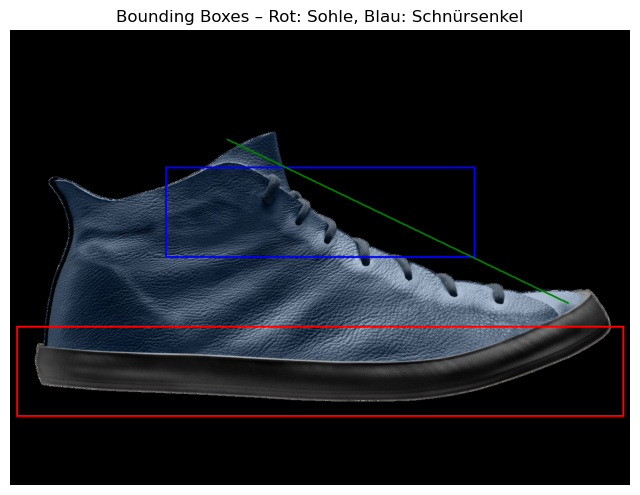

In [30]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Bild-Pfad anpassen
image_path = "/Users/annesoballa/Documents/semester4/blangblang/tinder-for-sneakers/tinder-for-sneakers/shoes/B25R11-U14S02L19-MIN.png"

# Bild laden
image = Image.open(image_path).convert("RGB")
w, h = image.size

# Relative Bounding Boxes in Pixelkoordinaten umwandeln
boxes = {
    "sole": (
        int(w * 0.01),  # x1
        int(h * 0.65),  # y1
        int(w * 0.99),  # x2
        int(h * 0.85)   # y2
    ),
    "laces": (
        int(w * 0.25),  # x1
        int(h * 0.3),   # y1
        int(w * 0.75),  # x2
        int(h * 0.5)    # y2
    ),
    "diagonal_sole": (
        int(w * 0.35),  # x1 (oben links)
        int(h * 0.24),  # y1
        int(w * 0.9),  # x2 (unten rechts)
        int(h * 0.6)   # y2
    )
}

# Bounding Boxes zeichnen
draw = ImageDraw.Draw(image)
draw.rectangle(boxes["sole"], outline="red", width=4)
draw.rectangle(boxes["laces"], outline="blue", width=4)

# Diagonale Box (von einem Punkt zur Diagonale)
draw.line([boxes["diagonal_sole"][0], boxes["diagonal_sole"][1], boxes["diagonal_sole"][2], boxes["diagonal_sole"][3]], fill="green", width=4)

# Anzeige mit Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis("off")
plt.title("Bounding Boxes – Rot: Sohle, Blau: Schnürsenkel")
plt.show()


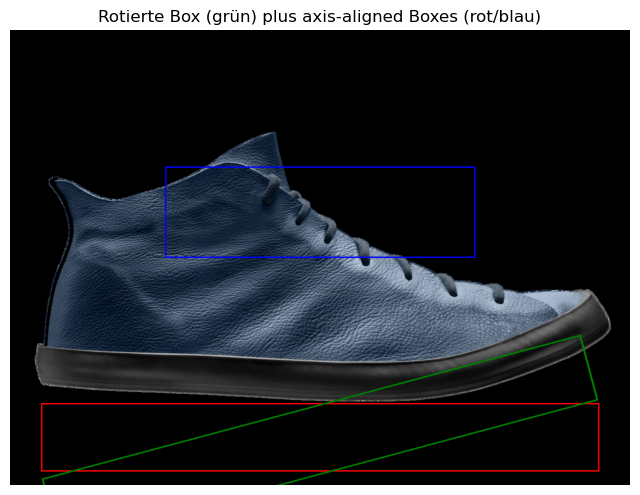

In [32]:
from PIL import Image, ImageDraw
import math
import matplotlib.pyplot as plt

# Pfad zum Bild anpassen
image_path = "/Users/annesoballa/Documents/semester4/blangblang/tinder-for-sneakers/tinder-for-sneakers/shoes/B25R11-U14S02L19-MIN.png"

# Bild laden
img = Image.open(image_path).convert("RGB")
w, h = img.size
draw = ImageDraw.Draw(img)

def draw_rotated_box(draw, center, width, height, angle_deg, outline="green", width_px=4):
    """
    Zeichnet ein gedrehtes Rechteck (Polygon) auf draw.
    - center: (cx, cy) Mittelpunkt in Pixeln
    - width, height: Seitenlängen in Pixeln
    - angle_deg: Drehung in Grad (gegen den Uhrzeigersinn)
    """
    cx, cy = center
    theta = math.radians(angle_deg)
    # Halbe Seitenvektoren
    dx = width / 2
    dy = height / 2
    # Eckpunkte in Objektkoordinaten (unrotiert)
    corners = [
        (-dx, -dy),
        ( dx, -dy),
        ( dx,  dy),
        (-dx,  dy),
    ]
    # Rotierte Eckpunkte in Bildkoordinaten
    rotated = []
    for x, y in corners:
        xr = x * math.cos(theta) - y * math.sin(theta)
        yr = x * math.sin(theta) + y * math.cos(theta)
        rotated.append((cx + xr, cy + yr))
    # Zeichne das Polygon (geschlossene Box)
    draw.polygon(rotated, outline=outline, width=width_px)

# Beispiel: axis-aligned Boxen (aus deinem Code)
boxes = {
    "sole": (int(w*0.05), int(h*0.82), int(w*0.95), int(h*0.97)),
    "laces": (int(w*0.25), int(h*0.3),  int(w*0.75), int(h*0.5))
}
draw.rectangle(boxes["sole"], outline="red",   width=3)
draw.rectangle(boxes["laces"], outline="blue", width=3)

# Beispiel: eine diagonale/rotierte Box
# (Zentrum, Breite, Höhe, Winkel in Grad)
center = (w*0.5, h*0.9)          # z.B. mittig unten
box_width, box_height = w*0.9, h*0.15   # z.B. breit und flach
angle = -15  # negative Grad = leicht nach rechts kippen

draw_rotated_box(draw, center, box_width, box_height, angle, outline="green", width_px=4)

# Anzeige
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.axis("off")
plt.title("Rotierte Box (grün) plus axis-aligned Boxes (rot/blau)")
plt.show()


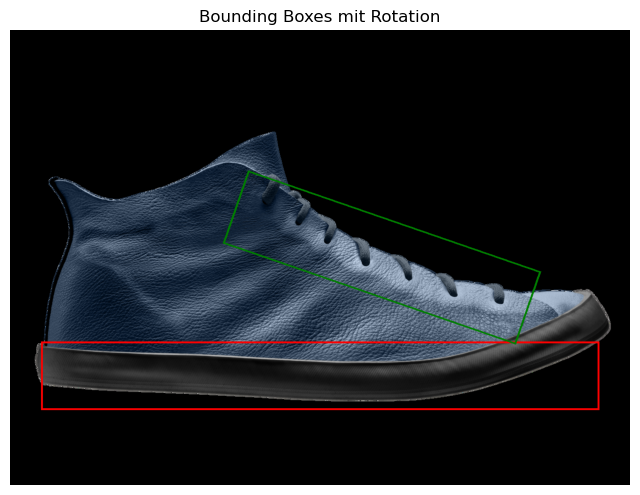

In [48]:
from PIL import Image, ImageDraw
import math
import matplotlib.pyplot as plt

# ==== Einstellungen ====
IMAGE_PATH = "/Users/annesoballa/Documents/semester4/blangblang/tinder-for-sneakers/tinder-for-sneakers/shoes/B25R11-U14S02L19-MIN.png"

# Definiere hier deine Parts mit:
#  - rel_center: (cx, cy) als Bruchteil von (0–1) der Bildbreite/Bildhöhe
#  - rel_size:   (w, h) als Bruchteil von Bildbreite/Bildhöhe
#  - angle:      Drehwinkel in Grad (gegen den Uhrzeigersinn)
#  - color:      Box-Farbe
PARTS = {
    "sole": {
        "rel_center": (0.5, 0.76),
        "rel_size":   (0.90, 0.15),
        "angle":      0,          # 0° = axis-aligned
        "color":      "red"
    },
    
    "laces": {
        "rel_center": (0.6, 0.5),
        "rel_size":   (0.5, 0.17),
        "angle":     19,         # negative = rechts kippen
        "color":      "green"
    }
}

def draw_rotated_box(draw, cx, cy, w, h, angle_deg, outline="green", width_px=4):
    """
    Zeichnet ein gedrehtes Rechteck (Polygon).
    (cx, cy): Mittelpunkt in Pixeln
    w, h: Breite und Höhe in Pixeln
    angle_deg: Drehwinkel in Grad gegen den Uhrzeigersinn
    """
    theta = math.radians(angle_deg)
    dx, dy = w/2, h/2
    # Ecken um Ursprung
    corners = [(-dx, -dy), (dx, -dy), (dx, dy), (-dx, dy)]
    rotated = []
    for x, y in corners:
        xr = x*math.cos(theta) - y*math.sin(theta)
        yr = x*math.sin(theta) + y*math.cos(theta)
        rotated.append((cx + xr, cy + yr))
    draw.polygon(rotated, outline=outline, width=width_px)

# ==== Bild laden ====
img = Image.open(IMAGE_PATH).convert("RGB")
w, h = img.size
draw = ImageDraw.Draw(img)

# ==== Boxes zeichnen ====
for name, p in PARTS.items():
    cx = p["rel_center"][0] * w
    cy = p["rel_center"][1] * h
    bw = p["rel_size"][0] * w
    bh = p["rel_size"][1] * h
    angle = p["angle"]
    color = p["color"]
    draw_rotated_box(draw, cx, cy, bw, bh, angle, outline=color, width_px=4)

# ==== Anzeige ====
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.axis("off")
plt.title("Bounding Boxes mit Rotation")
plt.show()
